In [1]:
import os 
os.chdir("/home/psenin/git/saxpy")
#os.chdir('C:/Users/ng6e164/PycharmProjects/saxpy')
os.getcwd()

'/home/psenin/git/saxpy'

In [2]:
import numpy as np
from saxpy.sax import sax_via_window
from saxpy.saxvsm import series_to_wordbag
from saxpy.saxvsm import manyseries_to_wordbag
from saxpy.saxvsm import bags_to_tfidf

In [3]:
dat = np.array([0., 0., 0., 0., 0., -0.270340178359072, -0.367828308500142,
                0.666980581124872, 1.87088147328446, 2.14548907684624,
                -0.480859313143032, -0.72911654245842, -0.490308602315934,
                -0.66152028906509, -0.221049033806403, 0.367003418871239,
                0.631073992586373, 0.0487728723414486, 0.762655178750436,
                0.78574757843331, 0.338239686422963, 0.784206454089066,
                -2.14265084073625, 2.11325193044223, 0.186018356196443,
                0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.519132472499234,
                -2.604783141655, -0.244519550114012, -1.6570790528784,
                3.34184602886343, 2.10361226260999, 1.9796808733979,
                -0.822247322003058, 1.06850578033292, -0.678811824405992,
                0.804225748913681, 0.57363964388698, 0.437113583759113,
                0.437208643628268, 0.989892093383503, 1.76545983424176,
                0.119483882364649, -0.222311941138971, -0.74669456611669,
                -0.0663660879732063, 0., 0., 0., 0., 0.,])
sax1 = sax_via_window(dat, 6, 3, 3, "none", 0.01)
sax1

defaultdict(list,
            {'aac': [4, 10, 11, 30, 35],
             'abc': [12, 14, 36, 44],
             'acb': [5, 16, 21, 37, 43],
             'acc': [13, 52, 53],
             'bac': [3, 19, 34, 45, 51],
             'bba': [31],
             'bbb': [15, 18, 20, 22, 25, 26, 27, 28, 29, 41, 42, 46],
             'bbc': [2],
             'bca': [6, 17, 32, 38, 47, 48],
             'caa': [8, 23, 24, 40],
             'cab': [9, 50],
             'cba': [7, 39, 49],
             'cbb': [33],
             'cca': [0, 1]})

In [4]:
f1 = series_to_wordbag(dat, 6, 3, 3, "none", 0.01)
f1

{'aac': 5,
 'abc': 4,
 'acb': 5,
 'acc': 3,
 'bac': 5,
 'bba': 1,
 'bbb': 12,
 'bbc': 1,
 'bca': 6,
 'caa': 4,
 'cab': 2,
 'cba': 3,
 'cbb': 1,
 'cca': 2}

In [5]:
m = np.matrix([dat,dat])
m.shape
f2 = manyseries_to_wordbag(m, 6, 3, 3, "none", 0.01)
f2

{'aac': 10,
 'abc': 8,
 'acb': 10,
 'acc': 6,
 'bac': 10,
 'bba': 2,
 'bbb': 24,
 'bbc': 2,
 'bca': 12,
 'caa': 8,
 'cab': 4,
 'cba': 6,
 'cbb': 2,
 'cca': 4}

In [6]:
bag1 = { "this": 10, "is": 1, "a": 2, "sample": 1}
bag2 = { "this": 10, "is": 1, "another": 2, "example": 3}
bags = {"bag1":bag1, "bag2":bag2}
str(bags)

"{'bag1': {'is': 1, 'sample': 1, 'this': 10, 'a': 2}, 'bag2': {'is': 1, 'another': 2, 'this': 10, 'example': 3}}"

In [7]:
[*bags.copy()]

['bag1', 'bag2']

In [8]:
res = bags_to_tfidf(bags)
res

{'classes': ['bag1', 'bag2'],
 'vectors': {'a': [0.761500010418809, 0.0],
  'another': [0.0, 0.761500010418809],
  'example': [0.0, 0.9609060278364028],
  'sample': [0.4804530139182014, 0.0]}}

In [9]:
res["vectors"]

{'a': [0.761500010418809, 0.0],
 'another': [0.0, 0.761500010418809],
 'example': [0.0, 0.9609060278364028],
 'sample': [0.4804530139182014, 0.0]}

In [11]:
import re

def read_data_file(fname):
    
    data = []
    
    with open(fname, 'r') as fp:
        read_lines = fp.readlines()
        for line in read_lines:
            tokens = re.split("\\s+", line.strip())
            data_line = []
            for token in tokens:
                data_line.append(float(token))
            class_label = data_line.pop(0)
            data.append((class_label, data_line))
        
    res = {}
    for key, arr in data:
        key = str(int(key))
        if key in res.keys():
            res[key].append(arr)
        else:
            dat = [arr]
            res[key] = dat
    
    return res
            
dd = read_data_file('resources/data/cbf/CBF_TRAIN')

In [12]:
for key, arr in dd.items():
    print(key)

1
2
3


In [13]:
bag1 = manyseries_to_wordbag(dd['1'], 30, 6, 6, "exact", 0.01)
bag2 = manyseries_to_wordbag(dd['2'], 30, 6, 6, "exact", 0.01)
bag3 = manyseries_to_wordbag(dd['3'], 30, 6, 6, "exact", 0.01)
bag1

{'aabeee': 1,
 'aabeef': 1,
 'aabefe': 1,
 'aabeff': 1,
 'aabfee': 1,
 'aabffe': 1,
 'aaceee': 5,
 'aaceef': 1,
 'aacefe': 2,
 'aacfee': 1,
 'aadeee': 9,
 'aadeef': 1,
 'aadefd': 1,
 'aaedee': 1,
 'aaeede': 1,
 'aaeeee': 9,
 'abaeef': 1,
 'abbdff': 2,
 'abbeee': 1,
 'abbeef': 2,
 'abbefe': 1,
 'abbeff': 3,
 'abbfef': 1,
 'abbffe': 1,
 'abceee': 1,
 'abceef': 1,
 'abdede': 1,
 'abdeee': 1,
 'abecdd': 1,
 'abedee': 3,
 'abeede': 4,
 'abeeed': 1,
 'abeeee': 4,
 'accedd': 1,
 'acdded': 2,
 'acddee': 2,
 'acdedd': 1,
 'acdede': 1,
 'acdeec': 1,
 'aceded': 1,
 'acedee': 1,
 'aceedd': 1,
 'aceede': 3,
 'aceeed': 1,
 'aceeee': 1,
 'acfcec': 1,
 'adcdde': 1,
 'adcede': 1,
 'addcde': 1,
 'addddc': 1,
 'addddd': 1,
 'adddde': 2,
 'addded': 2,
 'addedd': 3,
 'addede': 1,
 'addeed': 2,
 'addeee': 2,
 'adeddd': 1,
 'adedde': 2,
 'adeded': 1,
 'adedee': 1,
 'adeedd': 2,
 'aecece': 1,
 'aedcdd': 1,
 'aeddcd': 1,
 'aedddc': 1,
 'aedddd': 1,
 'aeddde': 1,
 'aedded': 1,
 'aededd': 1,
 'aedede': 1,
 'aeec

In [14]:
bags = {'1' : bag1, '2' : bag2, '3' : bag3}
[*bags.copy()]

['1', '2', '3']

In [15]:
vectors = bags_to_tfidf(bags)
vectors

{'classes': ['1', '2', '3'],
 'vectors': {'abddcf': [0.0, 1.206948960812582, 0.0],
  'dceceb': [0.0, 0.761500010418809, 0.0],
  'bcccdf': [0.0, 0.445448950393773, 0.28104699650060755],
  'aabeee': [0.761500010418809, 0.0, 0.0],
  'eeebac': [0.0, 0.0, 0.761500010418809],
  'ddcbce': [0.0, 0.761500010418809, 0.0],
  'decddb': [0.0, 0.0, 1.206948960812582],
  'debbdc': [0.0, 0.761500010418809, 0.0],
  'fbbccc': [0.761500010418809, 0.0, 0.0],
  'aeeecc': [0.0, 0.0, 0.761500010418809],
  'abecdd': [0.761500010418809, 0.0, 0.0],
  'ffebbb': [0.761500010418809, 0.0, 0.0],
  'bdcbed': [0.0, 0.761500010418809, 0.0],
  'deefba': [0.0, 0.761500010418809, 0.0],
  'dbdccd': [0.0, 0.761500010418809, 0.0],
  'bebced': [0.28104699650060755, 0.28104699650060755, 0.0],
  'bbdded': [0.0, 0.761500010418809, 0.0],
  'ebcdce': [0.0, 0.0, 0.761500010418809],
  'abdccf': [0.0, 0.761500010418809, 0.0],
  'cedddb': [0.445448950393773, 0.0, 0.28104699650060755],
  'cbbcfd': [0.0, 0.0, 0.761500010418809],
  'bded

In [37]:
import math

def tfidf_to_vector(tfidf, vector_label):
    if vector_label in tfidf['classes']:
        idx = tfidf['classes'].index(vector_label)
        weight_vec = {}
        for word, weights in vectors['vectors'].items():
            weight_vec[word] = weights[idx]
        return weight_vec
    else:
        return []

def cosine_similarity(weight_vec, test_bag):
        sumxx, sumxy, sumyy = 0, 0, 0
        for word in set([*weight_vec.copy()]).union([*test_bag.copy()]):
            x, y = 0, 0
            if word in weight_vec.keys():
                x = weight_vec[word]
            if word in test_bag.keys():
                y = test_bag[word]
            sumxx += x*x
            sumyy += y*y
            sumxy += x*y

        return 1. - sumxy/math.sqrt(sumxx*sumyy)
    

    

In [41]:
dt = read_data_file('resources/data/cbf/CBF_TEST')

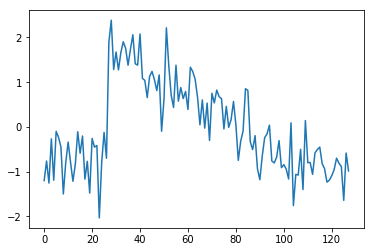

In [59]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

series = dt['3'][6]
x = np.arange(0, len(series))
y = np.asarray(series)

plt.plot(x,y)
plt.show()

In [60]:
test_bag = series_to_wordbag(series, 30, 6, 6, "exact", 0.01)
#test_bag

In [61]:
v1 = cosine_similarity( tfidf_to_vector(vectors, '1'), test_bag)
v2 = cosine_similarity( tfidf_to_vector(vectors, '2'), test_bag)
v3 = cosine_similarity( tfidf_to_vector(vectors, '3'), test_bag)

print('similarity to class 1:', v1, 
      'similarity to class 2:', v2,
      'similarity to class 3:', v3)

similarity to class 1: 0.9223961313806335 similarity to class 2: 0.9858046909612018 similarity to class 3: 0.7486202231881263


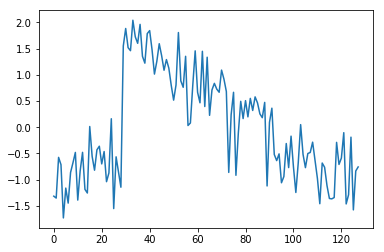

In [62]:
series = dd['3'][4]
x = np.arange(0, len(series))
y = np.asarray(series)

plt.plot(x,y)
plt.show()

In [35]:
from numpy import dot
from numpy.linalg import norm


def cosine_similarity(a, b):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    return dot(a, b)/(norm(a)*norm(b))

v1,v2 = [3, 45, 7, 2], [2, 54, 13, 15]
print(v1, v2, cosine_similarity(v1,v2))

[3, 45, 7, 2] [2, 54, 13, 15] 0.9722842517123499
